# Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [0]:
dataset = pd.read_csv('http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv')

In [3]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [0]:
X = dataset.drop('Channel', 1)
y = dataset['Channel']

# Data Preprocessing

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# K-Means Clustering

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit(X_train)
kmpredictions = km.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, kmpredictions)
print(cm) 

[[ 0  0  0]
 [ 3 53  0]
 [ 0 22 10]]


In [12]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test, kmpredictions)*100,'%')

accuracy =  71.5909090909091 %


# Visualising

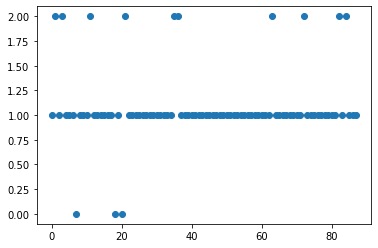

In [13]:
plt.plot(kmpredictions,'o')